In [1]:
#!pip install --upgrade tensorflow_hub

In [2]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Metal device set to: Apple M1


2021-08-30 15:40:57.461131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-30 15:40:57.461290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# 1. Preprocesar las Imagenes

In [4]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [5]:
imagen_contenido = load_image('starry_night_full.jpeg')
imagen_estilo = load_image('monet.jpeg')

# 2. Ver las imagenes

In [6]:
imagen_estilo.shape

TensorShape([1, 221, 228, 3])

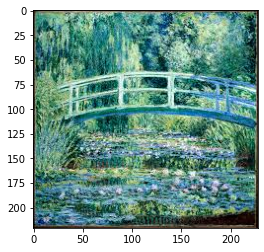

In [7]:
plt.imshow(np.squeeze(imagen_estilo))
plt.show()

In [8]:
imagen_contenido.shape

TensorShape([1, 1014, 1280, 3])

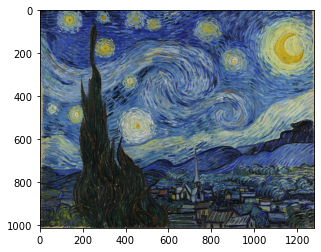

In [9]:
plt.imshow(np.squeeze(imagen_contenido))
plt.show()

# 3. Estilizar Imagen

In [10]:
imagen_estilizada = model(tf.constant(imagen_contenido), tf.constant(imagen_estilo))[0]

2021-08-30 15:40:58.418284: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-30 15:40:58.434303: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-30 15:40:58.435799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


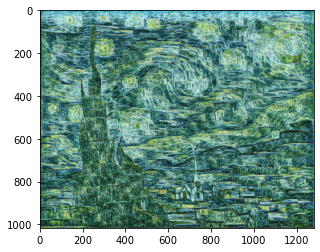

In [11]:
plt.imshow(np.squeeze(imagen_estilizada))
plt.show()

# 4. Descargar la Imagen

In [12]:
imagen_numpy = np.squeeze(imagen_estilizada)
imagen_numpy.shape

(1016, 1280, 3)

In [13]:
type(imagen_numpy)

numpy.ndarray

In [14]:
## Desnormalizar
imagen_numpy = imagen_numpy * 255
imagen_numpy = imagen_numpy.astype(np.uint8)

In [15]:
image = Image.fromarray(imagen_numpy)
image.save("imagen_resultante.jpeg")

In [16]:
image.show()